In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [56]:
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

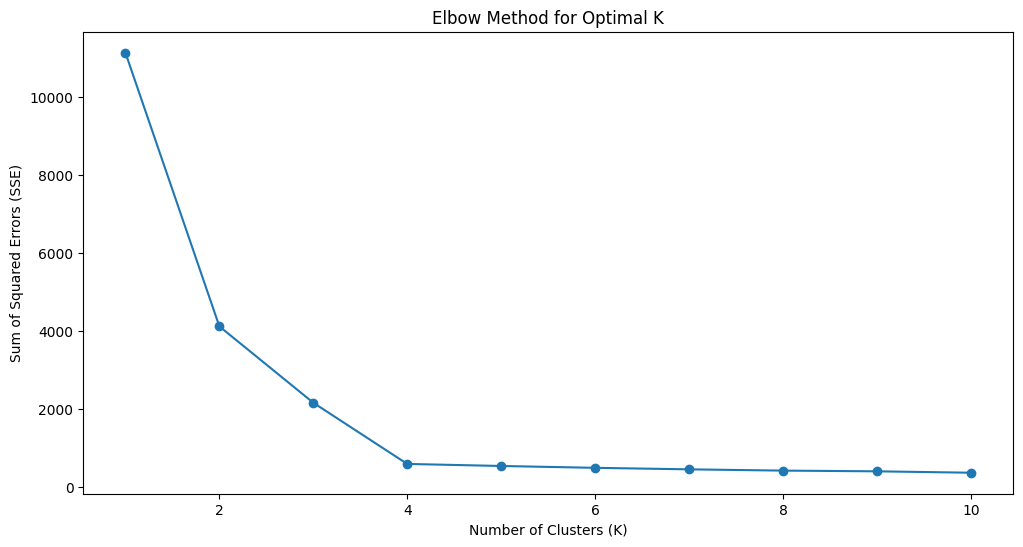

In [57]:
# Elbow Method to determine optimal K
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

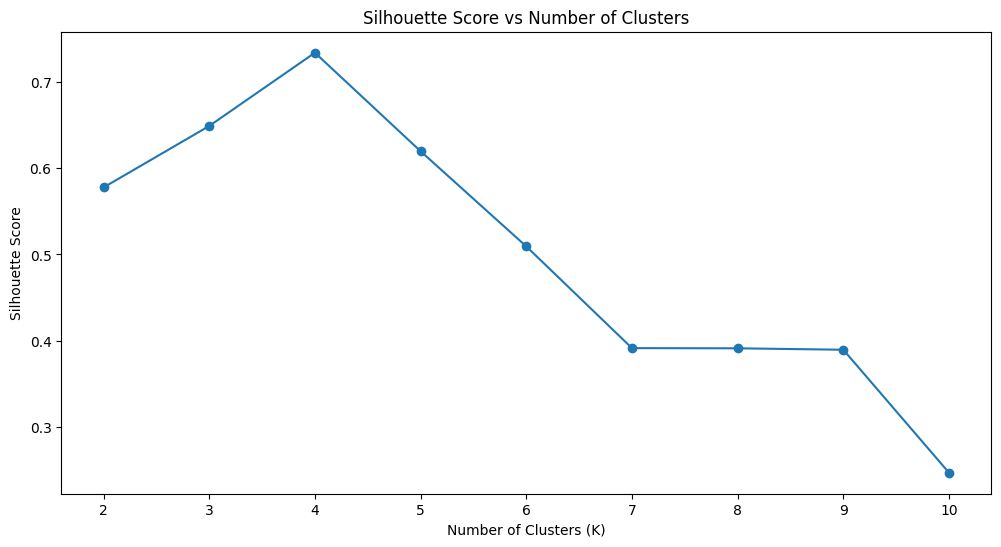

Best K according to Silhouette Score: 4


In [58]:
# Silhouette Score for different K
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Determine best K based on Silhouette Score
best_k = np.argmax(sil_scores) + 2  # +2 because we started from k=2
print(f"Best K according to Silhouette Score: {best_k}")

In [59]:
# Final K-Means with the best K
final_kmeans = KMeans(n_clusters=best_k)
labels = final_kmeans.fit_predict(X)

In [60]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = labels

In [61]:
df.sample(7)

,col1,col2,col3,label
167,1.086497,-4.277566,3.222141,2
110,4.888779,-3.161344,7.030857,2
174,5.248799,4.703359,-4.504789,3
199,-1.399000,3.280027,-4.629442,1
7,-1.825429,3.960892,-3.407527,1
178,3.951616,-1.395826,3.718264,2
186,-2.914847,2.951946,-5.579156,1


In [62]:
# Interactive 3D Scatter Plot using Plotly Express
fig = px.scatter_3d(
    df,
    x='col1',
    y='col2',
    z='col3',
    color='label',
    color_continuous_scale='Viridis',
    title=f'K-Means Clustering 3D — K={best_k}'
)

# Add cluster centroids
centroids = pd.DataFrame(final_kmeans.cluster_centers_, columns=['col1', 'col2', 'col3'])
fig.add_scatter3d(
    x=centroids['col1'],
    y=centroids['col2'],
    z=centroids['col3'],
    mode='markers',
    marker=dict(size=9, color='red', symbol='x'),
    name='Centroids'
)

fig.show()